In [106]:
print("Projet Python Bruno QUILLE & Marie VALLAEYS")
print("Problématique : étudier les prix d'un concert en Ile-de-France à partir d'un site d'annonce de concerts")
print(" 1/ faire un travail de scrapping sur un site de concert")
print(" 2/ décrire les données")
print(" 3/ Modélisation (Anova)")

Projet Python Bruno QUILLE & Marie VALLAEYS
Problématique : étudier les prix d'un concert en Ile-de-France à partir d'un site d'annonce de concerts
 1/ faire un travail de scrapping sur un site de concert
 2/ décrire les données
 3/ Modélisation (Anova)


In [1]:
#On télecharge les packages dont on va avoir besoin
import selenium #pip install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By  
import time
#BeautifulSoup , Request et Pandas
import urllib
import bs4
from urllib import request
import pandas 
#pour les graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#pour les régressions
from sklearn.linear_model import LinearRegression
#pour ANOVA
import scipy.stats as stats
from scipy.stats import bartlett

In [3]:
#On veut visualiser le site sur lequel on va travailler
# On a téléchargé le chrome driver http://chromedriver.storage.googleapis.com/index.html?path=2.24/
path_to_web_driver = "D:/Ensae/Python/chromedriver"
browser = webdriver.Chrome(path_to_web_driver)
browser.get('http://www.lylo.fr/agenda-concerts/')

In [5]:
#On a un souci concernant l'affichage de la totalité des concerts, il faut descendre le menu déroulant
#or on voit qu'il y a un identifiant en page suivante
#Aller sur la page suivante à partir de la page courante est équivalent à descendre le menu déroulant sur le côté

#On récupère le texte et l'id de la page suivante, qui apparait comme standardisé
lien='http://www.lylo.fr/agenda-concerts/'
request_text = request.urlopen(lien).read()
page = bs4.BeautifulSoup(request_text, "lxml")
s = page.find('div', {'class':'pagination'}).find('a')['href']
print("pour récupérer les données qui suivent la page courante il faut passer sur la page", s)

pour récupérer les données qui suivent la page courante il faut passer sur la page /agenda-concerts?page=2


In [8]:
#On définit une fonction pour récupérer nos données
#La taille est impressionnante mais elle est compréhensible !
def charger(nb):
    lien="http://www.lylo.fr/agenda-concerts" #on part du lien/page initial(e), et on veut récupérer
    liste_concert = [] # le nom du concert
    liste_category = [] # sa catégorie musicale
    liste_address = [] # le lieu
    liste_price = [] # son tarif
    liste_ville = [] # arrondissement ou ville
    request_text1 = request.urlopen(lien).read() 
    page1 = bs4.BeautifulSoup(request_text1, "lxml") #on récupére le texte et on va récupérer les éléments que l'on veut
    for item in page1.find('div', {'class':'events'}).findAll('a'):
        liste_concert.append(item.getText())
    for item in page1.findAll(attrs={'class':'place-name'}):
        liste_address.append(item.getText())
    for item in page1.findAll(attrs={'class':'price'}):
        liste_price.append(item.getText())
    for item in page1.findAll(attrs={'class':'category'}):
        liste_category.append(item.getText())
    for item in page1.findAll(attrs={'class':'address'}):
        liste_ville.append(item.getText())
    liste_price=[s.replace('€','') for s in liste_price] #on enlève le signe € et on met 0 
    liste_price=[s.replace('Gratuit','0') for s in liste_price] #on remplace gratuit par 0
    df1= pandas.DataFrame.from_dict( {"Concert" : liste_concert, "Prix" : liste_price, "Catégorie": liste_category, 
                                   "Lieux"  : liste_address, "Ville" :liste_ville},orient='index') #on nomme nos colonnes
    df1=df1.transpose() #on transpose le DataFrame
    table1 = df1[df1.Concert != 'Voir les concerts suivants'] # on enlève la dernière ligne 
    for i in range(2,nb):
        lienSuivant=lien+'?page='+str(i)
        request_text = request.urlopen(lienSuivant).read()
        page = bs4.BeautifulSoup(request_text, "lxml")
        for item in page.find('div', {'class':'events'}).findAll('a'):
            liste_concert.append(item.getText())
        for item in page.findAll(attrs={'class':'place-name'}):
            liste_address.append(item.getText())
        for item in page.findAll(attrs={'class':'price'}):
            liste_price.append(item.getText())
        for item in page.findAll(attrs={'class':'category'}):
            liste_category.append(item.getText())
        for item in page.findAll(attrs={'class':'address'}):
            liste_ville.append(item.getText())
        liste_price=[s.replace('€','') for s in liste_price] # on enlève le signe € et on met 0 
        liste_price=[s.replace('Gratuit','0') for s in liste_price] # on remplace gratuit par 0
        liste_concert=[i for i in liste_concert if i != 'Voir les concerts suivants']
        liste_price=[i for i in liste_price if i != '']
        liste_price=[s.replace(',','.') for s in liste_price]
        dfi= pandas.DataFrame.from_dict( {"Concert" : liste_concert, "Prix" : liste_price, "Catégorie": liste_category, 
                                   "Lieux"  : liste_address, "Ville" :liste_ville},orient='index')
        dfi=dfi.transpose() #on a itéré le processus sur le nombre de pages suivantes que l'on veut
    Tableau=table1.append(dfi)
    TF=Tableau.iloc[25:len(Tableau.index)] #on doit écraser la 1ère page qui est en double
    return TF

In [11]:
#on récupère le nombre de pages voulu
donnees=charger(60)

In [12]:
donnees

,Ville,Concert,Lieux,Prix,Catégorie
0,Paris 10e,Mary Candie's,L'Alhambra,28,Chanson
1,Paris 1er,42nd Street,Théâtre du Châtelet,22,Classique
2,Achères 78,Oldelaf - Happy Birthday,Le Sax,13.80,Chanson
3,Paris 10e,Le Chat Botté,L'Alhambra,19,Chanson
4,Paris 10e,Le Magicien des Couleurs,L'Alhambra,15,Chanson
5,Paris 1er,Vivaldi: Les 4 Saisons,La Sainte-Chapelle,27.50,Classique
6,Paris 12e,Skip School édition Rockabilly,Supersonic,0,Rock
7,Paris 1er,Mario Canonge & Michel Zenino,Baiser Salé,22,Jazz
8,Paris 10e,Piano Rigoletto & Tutti Frutti,L'Alhambra,24,Chanson
9,Paris 10e,Giroud & Stotz -,L'Alhambra,32,Chanson


In [2]:
#ATTENTION
#si jamais on exécute le code parfois on a un petit souci car certains concerts n'ont pas de calss prix !!
#cela décale la colonne prix, et à partir du DataFrame on ne peut pas dire d'où vient le décalage

#du coup on a fait un fichier le 21 décembre qui permet de voir le travail que l'on peut faire sur les données
#modulo ce souci corrigé dans excel ; dans notre exemple on a un décalage de 2 lignes, qui provient du concert de Sketch
#One le 22décembre et d'un concert hommage à Bowie le 7 janvier 

# on a exporté les données du DataFrame et on a mis le prix à 0 : 
#donnees.to_csv('D:/Ensae/Python/donnees_2112.csv')

#on peut importer le fichier propre
donnees=pandas.read_csv('D:/Ensae/Python/donnees_2112.csv',sep=';',encoding='latin-1',error_bad_lines=False)

#en théorie on peut travailler sur une table à n'importe quel moment-en veillant qu'il n'y ait pas de None à la fin de 
#la colonne Prix

In [3]:
donnees

,Ville,Concert,Lieux,Prix,Catégorie
0,Paris 10e,Mary Candie's,L'Alhambra,28,Chanson
1,Paris 1er,42nd Street,Théâtre du Châtelet,22,Classique
2,Achères 78,Oldelaf - Happy Birthday,Le Sax,13.80,Chanson
3,Paris 10e,Le Chat Botté,L'Alhambra,19,Chanson
4,Paris 10e,Le Magicien des Couleurs,L'Alhambra,15,Chanson
5,Paris 1er,Vivaldi: Les 4 Saisons,La Sainte-Chapelle,27.50,Classique
6,Paris 12e,Skip School édition Rockabilly,Supersonic,0,Rock
7,Paris 1er,Mario Canonge & Michel Zenino,Baiser Salé,22,Jazz
8,Paris 10e,Piano Rigoletto & Tutti Frutti,L'Alhambra,24,Chanson
9,Paris 10e,Giroud & Stotz -,L'Alhambra,32,Chanson


In [4]:
donnees.dtypes
#on a les prix pas en numérique

Ville        object
Concert      object
Lieux        object
Prix         object
Catégorie    object
dtype: object

In [5]:
print(donnees.loc[donnees['Prix'] == 'Annulé'])
#on a des prix en caractères car le concert est annulé

          Ville                                  Concert           Lieux  \
308   Paris 17e      Strauss   Hellmesberger  Waldteufel    Salle Wagram   
353   Paris 17e      Strauss   Hellmesberger  Waldteufel    Salle Wagram   
452   Paris 17e      Strauss   Hellmesberger  Waldteufel    Salle Wagram   
462   Paris 17e      Strauss   Hellmesberger  Waldteufel    Salle Wagram   
482   Paris 14e         La scène ouverte de l'entrepôt !        Entrepôt   
495    Paris 5e  Jam Session avec Caroline Porta Quartet  Café Universel   
729   Paris 10e                          Pharoahe  Monch     New Morning   
1014  Paris 14e         La scène ouverte de l'entrepôt !        Entrepôt   
1036   Paris 5e  Jam Session avec Caroline Porta Quartet  Café Universel   

        Prix  Catégorie  
308   Annulé  Classique  
353   Annulé  Classique  
452   Annulé  Classique  
462   Annulé  Classique  
482   Annulé    Chanson  
495   Annulé       Jazz  
729   Annulé    Hip-Hop  
1014  Annulé    Chanson  
1036 

In [6]:
#on supprime les concerts annulés
donnees = donnees[donnees.Prix != 'Annulé']

In [7]:
#on convertit les prix
donnees['Prix'] = donnees['Prix'].astype(float)

C:\Users\bruno\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
#statistiques complètes sur la variable d'intérêt
Desc=donnees['Prix'].describe()
print('Le prix maximal est',Desc[7])

Le prix maximal est 300.0


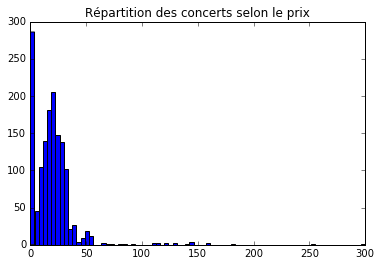

On observe une concentration des prix autour de  20.3981371515 €


In [9]:
#Distribution des prix
plt.title("Répartition des concerts selon le prix")
plt.hist(donnees["Prix"],bins=80)
plt.show()
print("On observe une concentration des prix autour de ", Desc[2],"€")

In [10]:
#On affiche le nombre de concert par genre musical 
T=donnees['Catégorie'].value_counts()
T

Jazz         351
Classique    321
Chanson      239
Rock         204
Electro      152
World        131
Groove        36
Hip-Hop       32
Name: Catégorie, dtype: int64

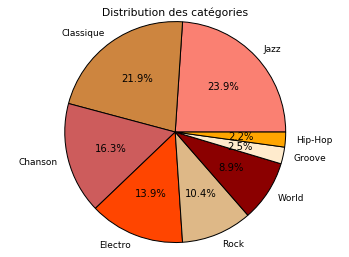

In [11]:
#Part de chaque catégorie de concert
cat_pct = donnees['Catégorie'].value_counts()

nom_categories= 'Jazz', 'Classique', 'Chanson', 'Electro', 'Rock', 'World', 'Groove', 'Hip-Hop'
couleurs_punchy= 'mediumturquoise', 'orangered', 'orange', 'seagreen', 'darkorange', 'tomato', 'teal', 'lightpink'
camaieu_beige = 'salmon', 'peru', 'indianred', 'orangered', 'burlywood', 'darkred', 'blanchedalmond', 'orange'

plt.pie(cat_pct, labels=nom_categories, colors=camaieu_beige, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Distribution des catégories')
plt.rcParams['text.color'] = 'k'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 9

plt.show()

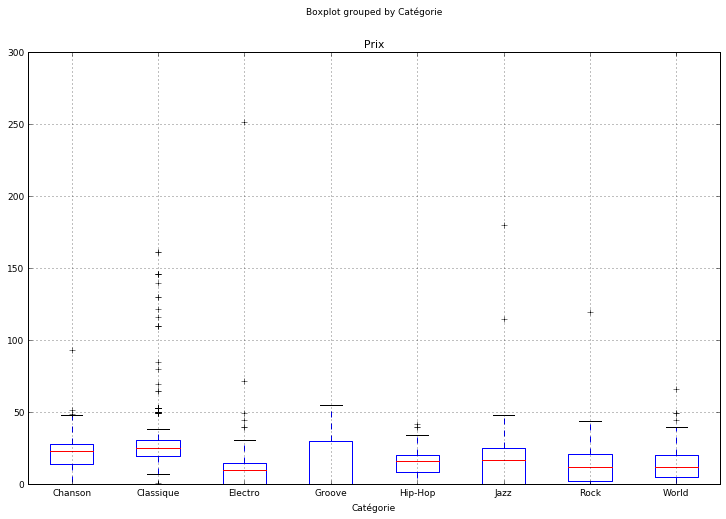

In [94]:
#Boîtes à moustaches sur les prix croisés aux catégories
donnees.boxplot('Prix',by='Catégorie',figsize=(12, 8))
plt.show()

Sur la période, il y a 280 concerts gratuits
Jazz         92
Rock         50
Electro      46
World        32
Chanson      28
Groove       21
Classique     6
Hip-Hop       5
Name: Catégorie, dtype: int64


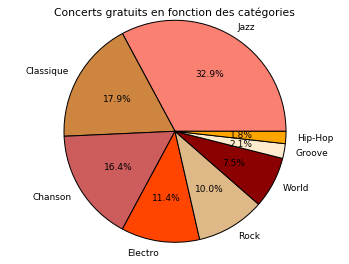

In [13]:
#On a aussi beaucoup de concerts gratuits
table_gratuit = donnees.loc[donnees['Prix'] == 0.0]
nbre_concerts_gratuits = len(table_gratuit)
print('Sur la période, il y a',nbre_concerts_gratuits,'concerts gratuits')

gratuit_par_cat = table_gratuit['Catégorie'].value_counts()
print(gratuit_par_cat)

plt.pie(gratuit_par_cat, labels=nom_categories, colors=camaieu_beige, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Concerts gratuits en fonction des catégories')
plt.rcParams['text.color'] = 'k'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 9
plt.show()

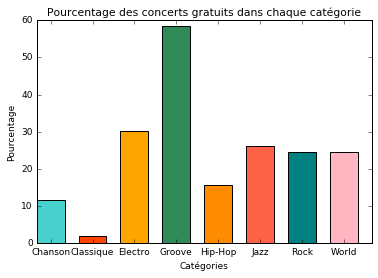

In [14]:
#on cherche à corriger l'effet taille concernant le pourcentage des concerts gratuits par catégorie
#premièrement, il faut que les catégories de T et de gratuit_corrigé soient affichés dans le même ordre
T2 = pandas.DataFrame.sort_index(T)

gratuit_corrigé = gratuit_par_cat/T2*100
gratuit_corrigé

#pour trier numériquement
import operator
sorted_gratuit_corrigé = sorted(gratuit_corrigé.items(), key=operator.itemgetter(1))
sorted_gratuit_corrigé

sorted_nom_categories = sorted(nom_categories)
plt.title("Pourcentage des concerts gratuits dans chaque catégorie")
import matplotlib.pyplot as plt
N = len(gratuit_corrigé)
x = range(N)
width = 1/1.5
plt.bar(x, gratuit_corrigé, width, color=couleurs_punchy, label = sorted_nom_categories)

plt.xlabel('Catégories')
plt.ylabel('Pourcentage')
ind = np.arange(N)
plt.xticks(ind + width/2., sorted_nom_categories)

plt.show()

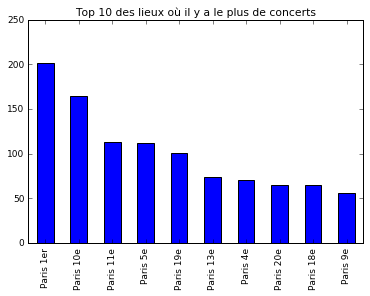

In [15]:
#nbre de concerts par lieux
prix_tot_endroit=donnees['Ville'].value_counts()
#Sorted_prix=sorted(prix_tot_endroit)
#Sorted_prix[-10,:]
prix_tot_endroit.head(10).plot(kind='bar')
plt.title("Top 10 des lieux où il y a le plus de concerts")
plt.show()

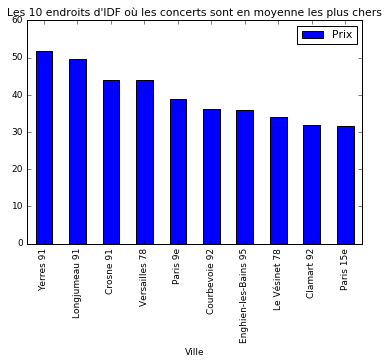

In [17]:
#nbre de concerts par lieux
#nbre_concert_endroit=donnees['Ville'].value_counts()
#nbre_concert_endroit

prix_mean_endroit=donnees['Prix'].groupby(donnees['Ville']).mean()
#prix_mean_endroit.sort_values('Prix', inplace=True)
pme = pandas.DataFrame(prix_mean_endroit, index=None, columns=None)
pme2 = pme.sort_values(by='Prix',ascending=False)
pme2.head(10).plot(kind='bar')

plt.title("Les 10 endroits d'IDF où les concerts sont en moyenne les plus chers")
plt.show()

In [96]:
#on fait des dummies sur les catégories
dummies_cat = pandas.get_dummies(donnees['Catégorie'])
dummies_cat.head()

,Chanson,Classique,Electro,Groove,Hip-Hop,Jazz,Rock,World
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#on concatène pour la régression
donneesR = pandas.concat([donnees, dummies_cat],axis=1)

In [98]:
#On vérifie le type 
donneesR.dtypes

Ville         object
Concert       object
Lieux         object
Prix         float64
Catégorie     object
Chanson      float64
Classique    float64
Electro      float64
Groove       float64
Hip-Hop      float64
Jazz         float64
Rock         float64
World        float64
dtype: object

In [99]:
#On renomme Hip-Hop car il python n'aime pas le tiret du 6
donneesR.rename(columns={'Hip-Hop':'HipHop'}, inplace=True)

In [102]:
a = donneesR.drop('Catégorie',axis=1)
b = a.drop('Concert',axis=1)
c = b.drop('Prix',axis=1)
d= c.drop('Lieux',axis=1)
e= d.drop('Ville',axis=1)

In [103]:
e

,Chanson,Classique,Electro,Groove,HipHop,Jazz,Rock,World
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#On fait une régression qui ne marche pas
# Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(e,donneesR.Prix)
print ('Estimated Intercept coefficient',lm.intercept_)
print ('Estimated coefficient',lm.coef_)
print ("La régression linéaire n'est pas adaptée...on est sur une seule variable explicative qualitative")

Estimated Intercept coefficient 2.44108752382e+14
Estimated coefficient [ -2.44108752e+14  -2.44108752e+14  -2.44108752e+14  -2.44108752e+14
  -2.44108752e+14  -2.44108752e+14  -2.44108752e+14  -2.44108752e+14]
La régression linéaire n'est pas adaptée...on est sur une seule variable explicative qualitative


In [59]:
#ANOVA
#Pour les genres musicaux
#on récupère les prix pour chaque genre
p_Electro = donnees.loc[(donnees.Catégorie == 'Electro'), ['Prix']]
p_Classique = donnees.loc[(donnees.Catégorie == 'Classique'), ['Prix']]
p_Rock = donnees.loc[(donnees.Catégorie == 'Rock'), ['Prix']]
p_Chanson = donnees.loc[(donnees.Catégorie == 'Chanson'), ['Prix']]
p_Groove = donnees.loc[(donnees.Catégorie == 'Groove'), ['Prix']]
p_HipHop = donnees.loc[(donnees.Catégorie == 'Hip-Hop'), ['Prix']]
p_Jazz = donnees.loc[(donnees.Catégorie == 'Jazz'), ['Prix']]
p_World = donnees.loc[(donnees.Catégorie == 'World'), ['Prix']]
#on fait des listes
E = list(p_Electro.Prix)
C = list(p_Classique.Prix)
R = list(p_Rock.Prix)
Ch = list(p_Chanson.Prix)
G = list(p_Groove.Prix)
H = list(p_HipHop.Prix)
J = list(p_Jazz.Prix)
W = list(p_World.Prix)

#on procède de même pour la distinction Paris / Banlieue
Paris=donnees.loc[donnees['Ville'].str.contains("Paris"),['Prix']]
Banlieue=donnees.loc[~donnees['Ville'].str.contains("Paris"),['Prix']]
P = list(Paris.Prix)
B = list(Banlieue.Prix)

In [78]:
#Test ANOVA sous hypothèses que les échantillons sont indépendants, sont normalement distribués et homoscédasticité
print("Test sur la modalité genre musical : ")
F=stats.f_oneway(E, C, R, Ch, G, H, J, W)
print(F,": on rejette l'hyptothèse nulle")
print("Test sur la distinction Paris / Banlieue : ")
f=stats.f_oneway(P, B)
print(f,": on ne rejette pas l'hyptothèse nulle")

Test sur la modalité genre musical : 
F_onewayResult(statistic=23.842210574711189, pvalue=7.3692024313066081e-31) : on rejette l'hyptothèse nulle
Test sur la distinction Paris / Banlieue : 
F_onewayResult(statistic=1.3714612381184994, pvalue=0.24175155294939718) : on ne rejette pas l'hyptothèse nulle


In [82]:
#on test la distribution normale des échantillons
n1=shapiro(E)
n2=shapiro(C)
n3=shapiro(R)
n4=shapiro(Ch)
n5=shapiro(G)
n6=shapiro(H)
n7=shapiro(J)
n8=shapiro(W)
nP=shapiro(P)
nB=shapiro(B)
print(n1)
print(n2)
print(n3)
print(n4)
print(n5)
print(n6)
print(n7)
print(n8)
print("on rejette la distribution normale des échantillons sauf pour le Hip-Hop")
print(nP)
print(nB)
print("on rejette la distribution normale des prix en Banlieue mais pas à Paris")
#on test l'hypothèse de variance égales
b1=bartlett(E, C, R, Ch, G, H, J, W)
b2=bartlett (P, B)
print(b1)
print(b2)
print("on rejette l'égalité des variances des sous-population respectives des 2 types de facteurs")

(0.3819369077682495, 1.176817649698912e-22)
(0.6071484088897705, 2.112483222520361e-26)
(0.7932001948356628, 1.0300392859480386e-15)
(0.9188375473022461, 3.849077723216965e-10)
(0.7468258738517761, 1.6784744047981803e-06)
(0.9402968287467957, 0.0763329267501831)
(0.6989490985870361, 1.338396498762781e-24)
(0.39014995098114014, 5.122399953765586e-21)
on rejette la distribution normale des échantillons sauf pour le Hip-Hop
(0.6188274621963501, 0.0)
(0.9277846813201904, 2.2587020254150048e-08)
on rejette la distribution normale des prix en Banlieue mais pas à Paris
BartlettResult(statistic=279.00498128969707, pvalue=1.8302621348432531e-56)
BartlettResult(statistic=77.428067710545449, pvalue=1.3764520569216562e-18)
on rejette l'égalité des variances des sous-population respectives des 2 types de facteurs


In [81]:
#On utilise le Kruskal-Wallis H-test plus robuste
print("Test robuste sur la modalité genre musical : ")
K=stats.kruskal(E, C, R, Ch, G, H, J, W)
print(K,": on rejette toujours l'hyptothèse nulle")
print("Test robuste sur la distinction Paris / Banlieue : ")
k=stats.kruskal(P, B)
print(k,": on ne rejette pas l'hyptothèse nulle")

Test robuste sur la modalité genre musical : 
KruskalResult(statistic=278.20234218731559, pvalue=2.7145556884593282e-56) : on rejette toujours l'hyptothèse nulle
Test robuste sur la distinction Paris / Banlieue : 
KruskalResult(statistic=0.55590947073213559, pvalue=0.45591309024269744) : on ne rejette pas l'hyptothèse nulle


In [ ]:
#Conclusion : 
# le genre musical semble déterminant sur les prix mais pas la localisation Paris / Banlieue

In [ ]:
#Pour aller plus loin :